for continious states we use deep qn
we can discretize state spaces for now
use np.linspace to discretize

In [15]:
import numpy as np

In [16]:
class Agent:
    def choose_action(self,state):
        action = 0
        if np.random.uniform(0,1) < self.epsilon:
            action = self.action_space.sample()
        else:
            action = np.argmax(self.Q[state])
        return action

In [3]:
class NStepSarsa(Agent):
    def __init__(self,n,epsilon,alpha,gamma,Q,action_space):
        self.n = n
        self.epsilon = epsilon 
        self.alpha = alpha
        self.gamma = gamma
        self.Q = Q
        self.action_space = action_space

In [10]:
import gym
import math
env = gym.make("MountainCar-v0")

env.observation_space

NUM_ACTIONS = env.action_space.n

MIN_EXPLORE_RATE = .01
MIN_LEARNING_RATE = .2
NUM_BUCKETS = (18,14)
NUM_EPISODES = 500
DEBUG = False

def get_explore_rate(t):
    return max(MIN_EXPLORE_RATE, min(1, 1.0 - math.log10((t+1)/25)))

def get_learning_rate(t):
    return max(MIN_LEARNING_RATE, min(0.5, 1.0 - math.log10((t+1)/25)))

q = np.zeros(NUM_BUCKETS + (NUM_ACTIONS,))


def get_bucket(state):
    [pos,vel] = state
    pos_state_idx = int(round(pos+1.2,1)*10)
    vel_state_idx = int(round(vel+.07,2)*100)
    return tuple([pos_state_idx,vel_state_idx])

nStepSarsaAgent = NStepSarsa(1,1,1,1,q,env.action_space)

REWARDS = {}


for n in [2,4,6,8,16,32,64,128,256]:
    if DEBUG:
        print("starting n:",n)
    for alpha in np.linspace(0,1,6):
        agent.n = n

        for episode in range(NUM_EPISODES):

            agent.alpha = alpha
            agent.epsilon = get_explore_rate(episode)

            obv = env.reset()
            t = 0
            T = np.inf
            state = get_bucket(obv)
            action = agent.choose_action(state)

            actions = [action]
            states = [state]
            rewards = [0]
            accum_reward = 0
            while True:
                if t < T:
                    if DEBUG:
                        env.render()
                    obv,reward,done,_ = env.step(action)
                    state = get_bucket(obv)
                    accum_reward += reward
                    states.append(state)
                    rewards.append(reward)

                    if done:
                        T = t +1
                    else:
                        action = agent.choose_action(state)
                        actions.append(action)

                tau = t - agent.n +1
                if tau >= 0:
                    G = 0
                    for i in range(tau + 1, min(tau + agent.n + 1, T + 1)):
                        G += np.power(agent.gamma, i - tau - 1) * rewards[i]
                    if tau + agent.n < T:
                        state_action = (states[tau + agent.n], actions[tau + agent.n])
                        G += np.power(agent.gamma, agent.n) * agent.Q[state_action[0]][state_action[1]]
                    state_action = (states[tau], actions[tau])
                    agent.Q[state_action[0]][state_action[1]] += agent.alpha * (G - agent.Q[state_action[0]][state_action[1]])

                if tau == T - 1:
                    if n not in REWARDS:
                        REWARDS[n] = [accum_reward]
                    else:
                        REWARDS[n].append(accum_reward)
                    break
                t += 1
            REWARDS[N]
env.close()

ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

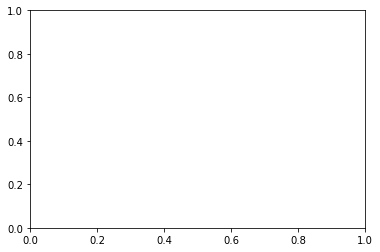

In [14]:
from matplotlib import pyplot as plt

episodes = np.arange(NUM_EPISODES)
for n in [2,4,6,8,16,32,64,128,256]:
    plt.plot(np.linspace(0,1,6),np.mean(REWARDS[n]),label = "n={n}".format(n=n))
plt.legend()
plt.show()